## Customer Card Offer

In [21]:
import pandas as pd
import numpy as np

In [22]:
# Reading Dataset
df = pd.read_csv("D:/PGA/Vista/Test 1.csv")
df.head()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
0,713782,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289,False
1,515901,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264,False
2,95166,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035,False
3,425557,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619,False
4,624581,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304,False


## EDA

In [23]:
# Describing num variable
df.describe()

,customer_id,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,496819.831400,65853.355259,20.962621,0.329419,662.548800,670.042869,25.692162,0.393211
std,287391.314157,31093.369592,18.841121,0.223299,90.549985,89.965854,1.889274,0.288243
min,244.000000,2.054543,-2.140206,0.001781,500.000000,324.436647,21.363123,-0.000052
25%,245172.500000,39165.786086,6.150577,0.156965,600.000000,609.231181,24.295435,0.139424
50%,495734.000000,76903.628763,11.913366,0.272263,655.000000,669.493442,25.611903,0.337841
75%,745475.250000,91032.514900,32.238914,0.459890,727.000000,730.484985,27.062519,0.624886
max,999870.000000,150538.809704,81.759632,1.144357,849.000000,1004.497869,30.131214,1.000000


In [24]:
# Describing Cat variables
df.describe(include = ["object"])

,demographic_slice,country_reg,ad_exp
count,10000,10000,10000
unique,4,2,2
top,BWEsk45,E,N
freq,2569,5007,5006


In [23]:
#Checking for the type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id          10000 non-null int64
demographic_slice    10000 non-null object
country_reg          10000 non-null object
ad_exp               10000 non-null object
est_income           10000 non-null float64
hold_bal             10000 non-null float64
pref_cust_prob       10000 non-null float64
imp_cscore           10000 non-null int64
RiskScore            10000 non-null float64
imp_crediteval       10000 non-null float64
axio_score           10000 non-null float64
card_offer           10000 non-null bool
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 869.2+ KB


In [24]:
#checking Null Values
df.isnull().sum()

customer_id          0
demographic_slice    0
country_reg          0
ad_exp               0
est_income           0
hold_bal             0
pref_cust_prob       0
imp_cscore           0
RiskScore            0
imp_crediteval       0
axio_score           0
card_offer           0
dtype: int64

In [25]:
# Checking NA values
df.isna().sum()

customer_id          0
demographic_slice    0
country_reg          0
ad_exp               0
est_income           0
hold_bal             0
pref_cust_prob       0
imp_cscore           0
RiskScore            0
imp_crediteval       0
axio_score           0
card_offer           0
dtype: int64

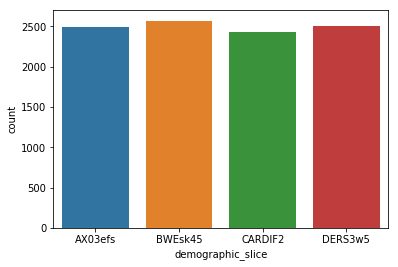

In [28]:
# Exploring Categorical Var
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['demographic_slice'])

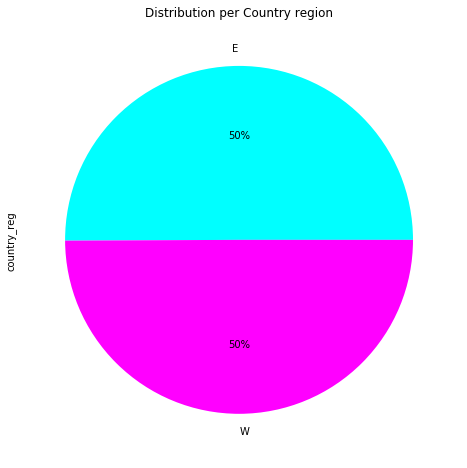

In [33]:
# Checking Distribution
df['country_reg'].value_counts().plot(kind='pie',autopct='%1.f%%',cmap = plt.cm.cool)
plt.title('Distribution per Country region')
fig=plt.gcf()
fig.set_size_inches(8,8)

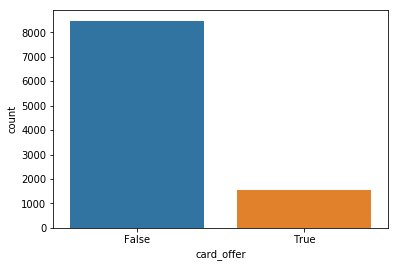

In [32]:
# Checking Y variable
sns.countplot(df['card_offer'])

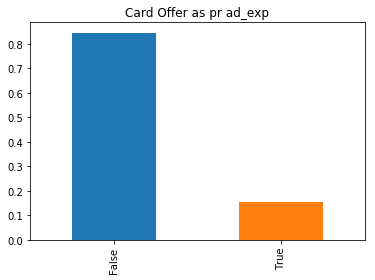

In [35]:
# looking relationship between ad_exp and card_offer
plt.title("Card Offer as pr ad_exp")
df[df['ad_exp'] == 'Y']['card_offer'].value_counts(normalize=True).plot.bar()

In [3]:
# Cchanging bool into int
df['card_offer'] = df['card_offer'].astype(int)
df.head()
df.tail()

,customer_id,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score,card_offer
9995,708045,DERS3w5,W,N,72212.336133,9.592934,0.520371,729,757.494653,26.021340,0.337363,0
9996,113769,DERS3w5,E,Y,90497.218026,59.521970,0.225221,680,734.066443,26.965962,0.030833,0
9997,134806,DERS3w5,E,N,79895.772666,44.698361,0.441161,806,703.556659,27.397851,0.399311,1
9998,322999,DERS3w5,E,N,90628.734407,45.757132,0.146398,619,744.723237,24.670500,0.591272,0
9999,733034,DERS3w5,E,N,85069.799184,52.880255,0.236454,718,514.474908,27.045362,0.318503,0


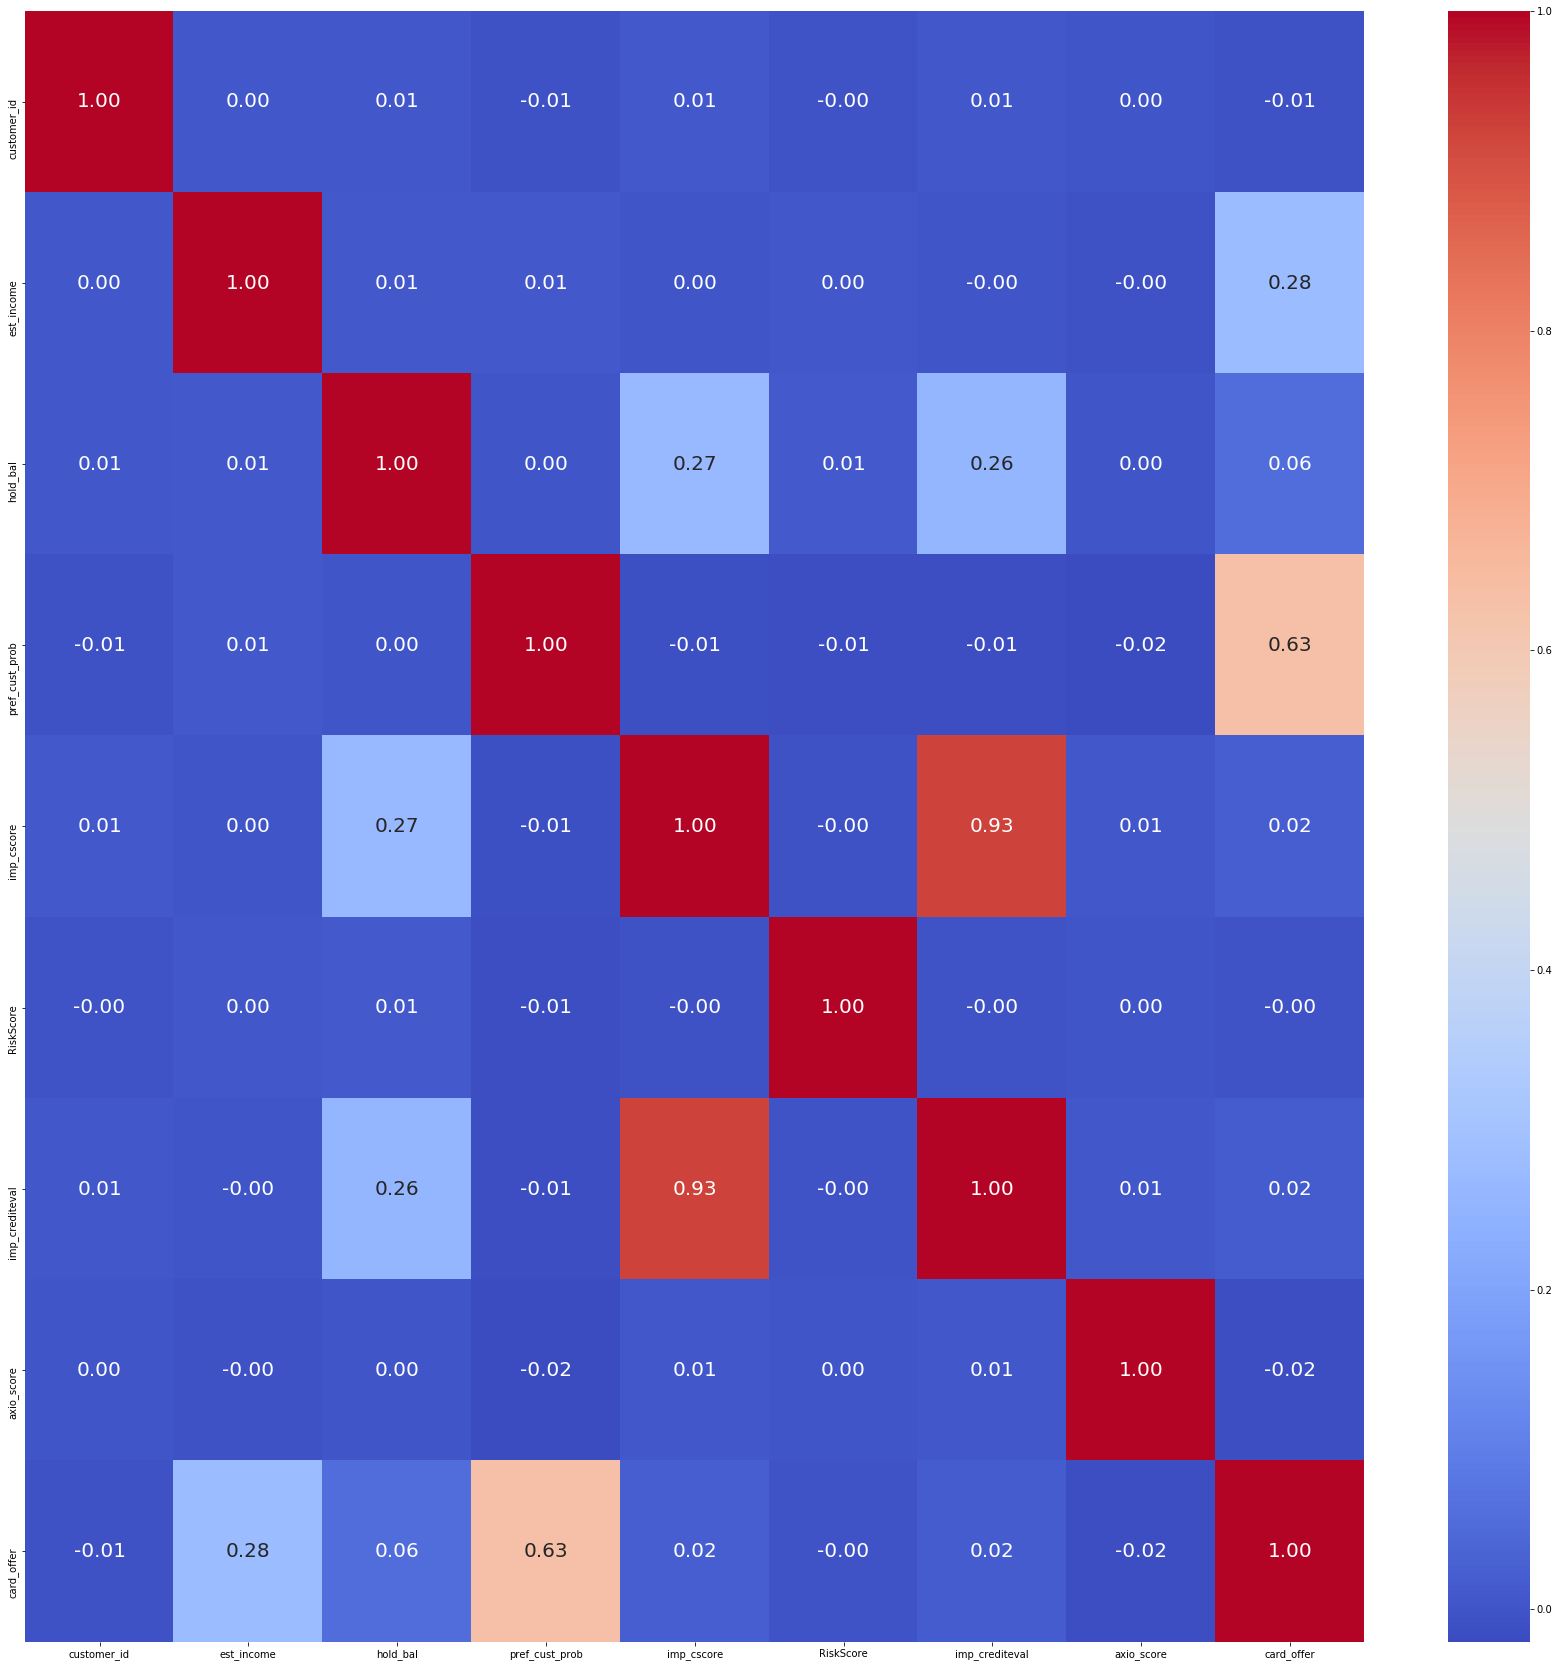

In [36]:
# Checking corr between integer variables
corr = df.corr()
plt.figure(figsize = (30, 30))
sns.heatmap(corr, fmt = '.2f', annot= True, annot_kws={'size':20}, cmap = "coolwarm")

## Data Cleaning

In [51]:
# Removing unwanted columns
df_x = df.drop(['card_offer','customer_id'], axis=1)
df_x.head()

,demographic_slice,country_reg,ad_exp,est_income,hold_bal,pref_cust_prob,imp_cscore,RiskScore,imp_crediteval,axio_score
0,AX03efs,W,N,33407.901749,3.000000,0.531112,619,503.249027,23.977827,0.137289
1,AX03efs,E,N,19927.533533,20.257927,0.297439,527,820.108146,22.986398,0.052264
2,AX03efs,W,Y,51222.470997,4.000000,0.018463,606,586.605795,24.939219,0.452035
3,AX03efs,E,Y,67211.587467,18.653631,0.089344,585,634.701982,24.841147,0.564619
4,AX03efs,W,N,20093.342158,4.000000,0.094948,567,631.949979,24.679363,0.917304


In [52]:
df_y = df['card_offer']
df_y.head()

0    False
1    False
2    False
3    False
4    False
Name: card_offer, dtype: bool

In [54]:
# Making Dummies of int variable
df_x = pd.get_dummies(df_x)
df_x.head()
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
est_income                   10000 non-null float64
hold_bal                     10000 non-null float64
pref_cust_prob               10000 non-null float64
imp_cscore                   10000 non-null int64
RiskScore                    10000 non-null float64
imp_crediteval               10000 non-null float64
axio_score                   10000 non-null float64
demographic_slice_AX03efs    10000 non-null uint8
demographic_slice_BWEsk45    10000 non-null uint8
demographic_slice_CARDIF2    10000 non-null uint8
demographic_slice_DERS3w5    10000 non-null uint8
country_reg_E                10000 non-null uint8
country_reg_W                10000 non-null uint8
ad_exp_N                     10000 non-null uint8
ad_exp_Y                     10000 non-null uint8
dtypes: float64(6), int64(1), uint8(8)
memory usage: 625.1 KB


## Splitting Train and Test

In [111]:
# Splitting train and test
from sklearn.model_selection import train_test_split
df_train, df_test, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.25, random_state = 4)

In [112]:
print('Training X Shape:', df_train.shape)
print('Training Y Shape:', df_train_y.shape)
print('Testing X Shape:', df_test.shape)
print('Testing Y Shape:', df_test_y.shape)

Training X Shape: (7500, 15)
Training Y Shape: (7500,)
Testing X Shape: (2500, 15)
Testing Y Shape: (2500,)


## Model Building 

### Logistic Regression

In [113]:
#bulding a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit (df_train,df_train_y)
# Predicting Y
log_pred = model.predict(df_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [114]:
from sklearn import metrics
# Checking Accyracy
print('Accuracy:', metrics.accuracy_score(df_test_y, log_pred))

Accuracy: 0.8436


In [115]:
# Printing Confusion Metrix
confusion_matrix(df_test_y, log_pred)

array([[2105,    5],
       [ 386,    4]], dtype=int64)

## Upsampling

In [119]:
# As we can see our data is imbalanced we need to do upsampling 
# As the ratio between True and False in Class variable is very low we need to do upsampling of the data
from sklearn.utils import resample
# Separate majority and minority classes
major = df[df.card_offer==0]
minor = df[df.card_offer==1]
# Upsample minority class
minority_upsampled = resample(minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=8469,    # to match majority class
                                 random_state=1) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([major, minority_upsampled])
 # Display new class counts
df_upsampled.card_offer.value_counts()

True     8469
False    8469
Name: card_offer, dtype: int64

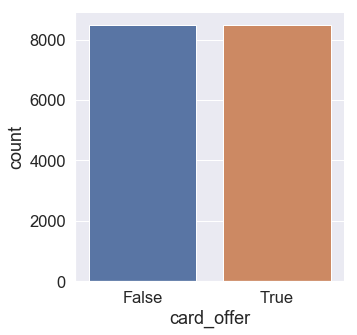

In [123]:
#Checikng for data balancing
sns.catplot(x="card_offer", kind="count", data=df_upsampled);

In [124]:
df_upsampled_x = df_upsampled.drop(['card_offer','customer_id'], axis=1)
df_upsampled_y = df_upsampled['card_offer']
df_upsampled_y.head()

0    False
1    False
2    False
3    False
4    False
Name: card_offer, dtype: bool

## Splitting  upsampled data into Train and Test

In [118]:
# Splitting train and test
from sklearn.model_selection import train_test_split
df_train, df_test, df_train_y, df_test_y = train_test_split(df_upsampled_x, df_upsampled_y, test_size = 0.25, random_state = 4)

In [77]:
print('Training X Shape:', df_train.shape)
print('Training Y Shape:', df_train_y.shape)
print('Testing X Shape:', df_test.shape)
print('Testing Y Shape:', df_test_y.shape)

Training X Shape: (12703, 15)
Training Y Shape: (12703,)
Testing X Shape: (4235, 15)
Testing Y Shape: (4235,)


## Model Building on upsampled data

### Logistic Regression

In [125]:
#bulding a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit (df_train,df_train_y)
# Predicting Y
log_pred = model.predict(df_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [126]:
from sklearn import metrics
# Checking Accyracy
print('Accuracy:', metrics.accuracy_score(df_test_y, log_pred))

Accuracy: 0.6760330578512397


In [127]:
# Printing Confusion Metrix
confusion_matrix(df_test_y, log_pred)

array([[1181,  917],
       [ 455, 1682]], dtype=int64)

### Random Forest

In [82]:
# log regression wasn't giving good result so let us just build another model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 0,max_depth=4)
rf.fit(df_train, df_train_y)
predictions = rf.predict(df_test)

In [128]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(df_test_y, predictions))

Accuracy: 0.9369539551357733


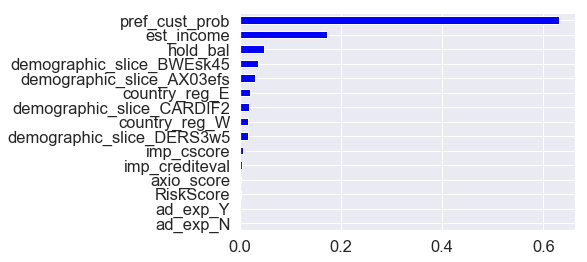

In [129]:
#To  find importance of variable
importances_rf = pd.Series(rf.feature_importances_,index=df_train.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf .plot(kind = 'barh',color = 'blue')

In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_test_y, predictions)

array([[1928,  170],
       [  97, 2040]], dtype=int64)

In [132]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[6]
export_graphviz(tree, out_file = 'tree.dot', feature_names = col, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')


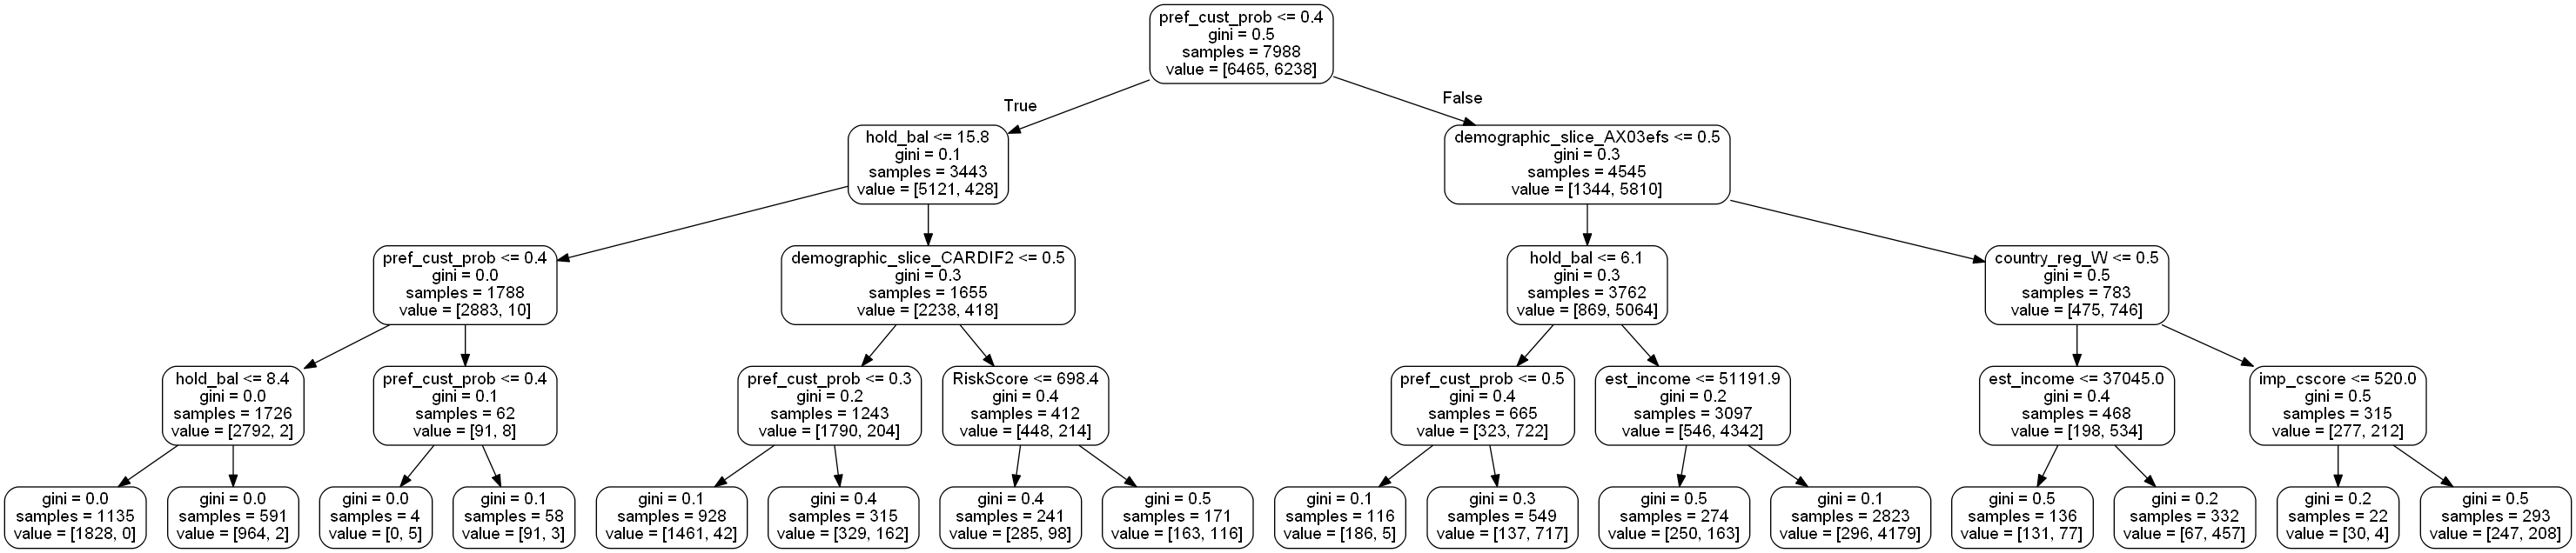

In [133]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')